In [237]:
#pip install dateparser

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
import numpy as np

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import  f_regression, SelectKBest
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Personally defined module
import Useful_tools as ut

pd.set_option("display.max_columns", None)

In [239]:
#Changes the event date to a datetime datatype
#df1 = pd.read_csv('Africa_1997-2020_Jan08.csv', encoding = 'latin1', 
                 #parse_dates=['EVENT_DATE'], date_parser=dateparser.parse)

#No changes
df = pd.read_csv('Africa_1997-2020_Jan08.csv', encoding = 'latin1')

In [240]:
df.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,ACTOR2,ASSOC_ACTOR_2,INTER2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,01-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,02-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Relizane,Mazouna,NaN,Hassasna,36133,883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,03-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Saida,Youb,NaN,Hassi El Abed,34966,-29,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,04-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Blida,Blida,NaN,Blida,36469,2829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,05-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226


In [241]:
#df.head(2).T

In [242]:
df.shape

(65535, 29)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISO               65535 non-null  int64 
 1   EVENT_ID_CNTY     65535 non-null  object
 2   EVENT_ID_NO_CNTY  65535 non-null  int64 
 3   EVENT_DATE        65535 non-null  object
 4   YEAR              65535 non-null  int64 
 5   TIME_PRECISION    65535 non-null  int64 
 6   EVENT_TYPE        65535 non-null  object
 7   SUB_EVENT_TYPE    65535 non-null  object
 8   ACTOR1            65535 non-null  object
 9   ASSOC_ACTOR_1     12768 non-null  object
 10  INTER1            65535 non-null  int64 
 11  ACTOR2            50346 non-null  object
 12  ASSOC_ACTOR_2     11167 non-null  object
 13  INTER2            65535 non-null  int64 
 14  INTERACTION       65535 non-null  int64 
 15  REGION            65535 non-null  object
 16  COUNTRY           65535 non-null  object
 17  ADMIN1      

In [244]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)
    else: num.append(i)
print(cat)

['EVENT_ID_CNTY', 'EVENT_DATE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'ASSOC_ACTOR_1', 'ACTOR2', 'ASSOC_ACTOR_2', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'SOURCE', 'SOURCE_SCALE', 'NOTES']


In [245]:
df[cat].nunique().sort_values()

REGION                5
EVENT_TYPE            6
COUNTRY              20
SOURCE_SCALE         23
SUB_EVENT_TYPE       25
ADMIN1              317
ACTOR2             1402
ACTOR1             1645
ADMIN2             1832
ASSOC_ACTOR_1      1866
ASSOC_ACTOR_2      2069
ADMIN3             2672
SOURCE             4129
EVENT_DATE         8244
LOCATION           8381
NOTES             55547
EVENT_ID_CNTY     65535
dtype: int64

In [246]:
(df.isnull().sum()/df.shape[0] * 100)[df.isnull().sum() > 0 ] #percentage of missing values

ASSOC_ACTOR_1    80.517281
ACTOR2           23.176928
ASSOC_ACTOR_2    82.960250
ADMIN3           20.148013
NOTES             3.973449
dtype: float64

In [247]:
list(df['NOTES'].iloc[:5].values)

['5 January: Beheading of 5 citizens in Douaouda (Tipaza).',
 'Two citizens were beheaded in Hassasna.',
 'Two citizens were killed in a raid on the village of Hassi El Abd. Several televisions were destroyed and the school of the village burned.',
 '4 January: 16 citizens were murdered in the village of Benachour (Blida) by masked men a few hundred meters away from a military camp. It is of note that the citizens of this village had refused to set up armed militias.',
 '5 January: Killing of 18 citizens in the Oliviers district of Douaouda (Tipaza). Among the victims are 3 children and 6 women. This region had refused to organise armed militias.']

In [248]:
 dr_df = df.drop(columns = ['EVENT_ID_CNTY', 'ASSOC_ACTOR_1', 'ASSOC_ACTOR_2'])

<Axes: >

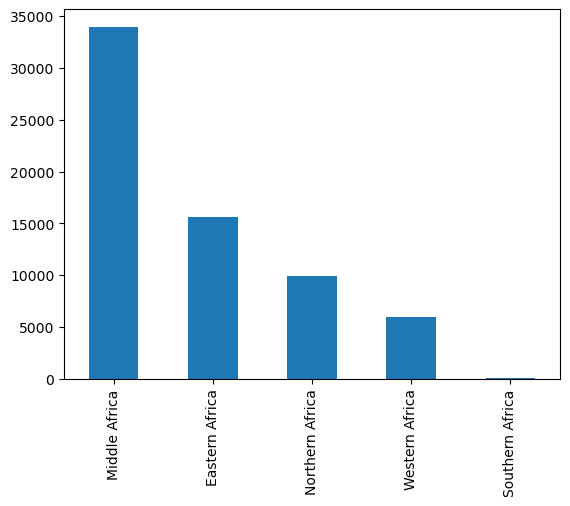

In [249]:
dr_df['REGION'].value_counts().plot(kind = 'bar')

In [250]:
dr_df[['REGION']].groupby('REGION')['REGION'].count()

REGION
Eastern Africa     15592
Middle Africa      33945
Northern Africa     9936
Southern Africa       77
Western Africa      5985
Name: REGION, dtype: int64

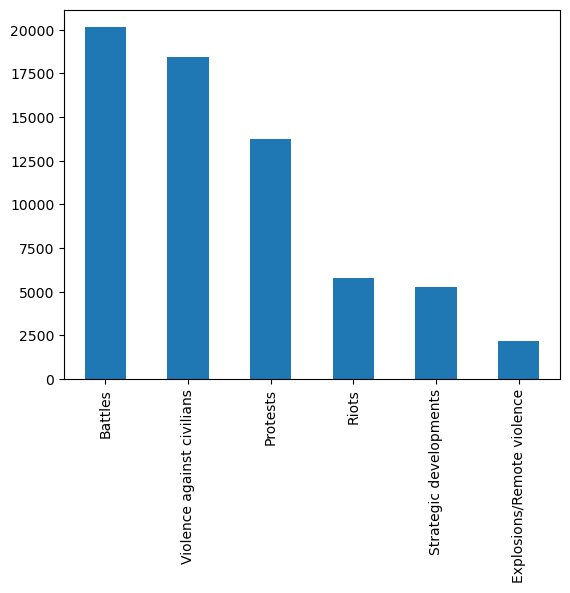

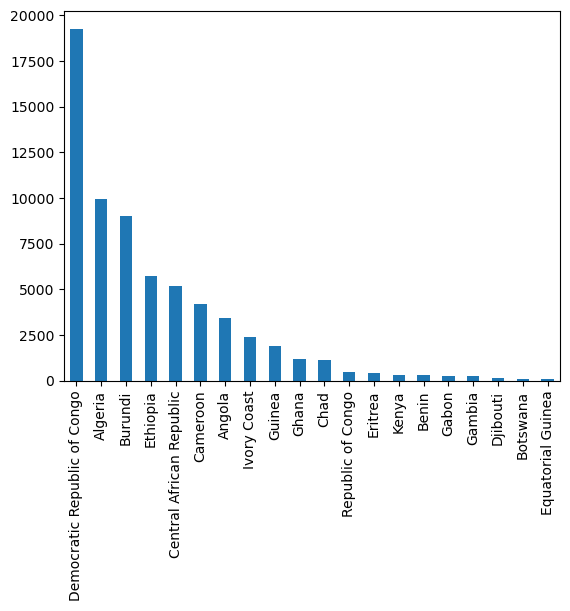

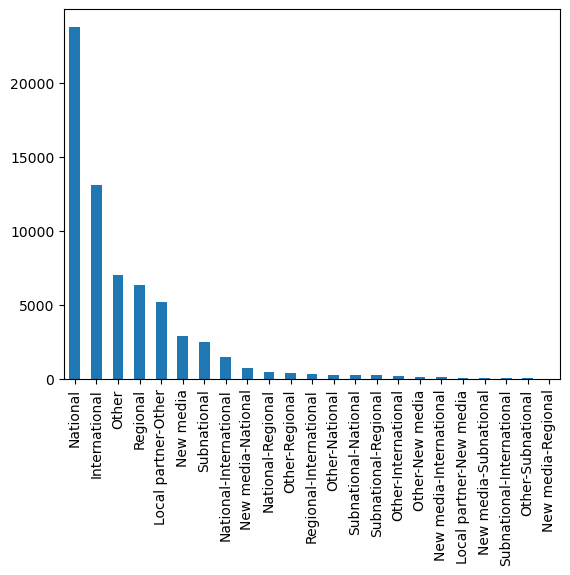

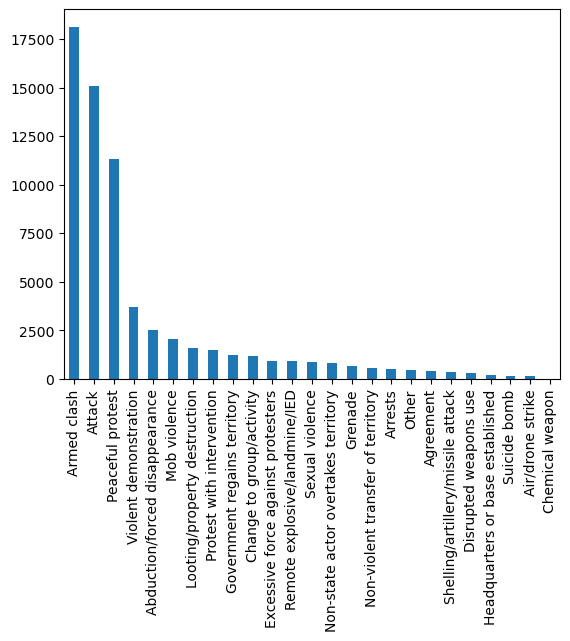

In [251]:
dr_df['EVENT_TYPE'].value_counts().plot(kind = 'bar')
plt.show()
dr_df['COUNTRY'].value_counts().plot(kind = 'bar')
plt.show()
dr_df['SOURCE_SCALE'].value_counts().plot(kind = 'bar')
plt.show()
dr_df['SUB_EVENT_TYPE'].value_counts().plot(kind = 'bar')
plt.show()


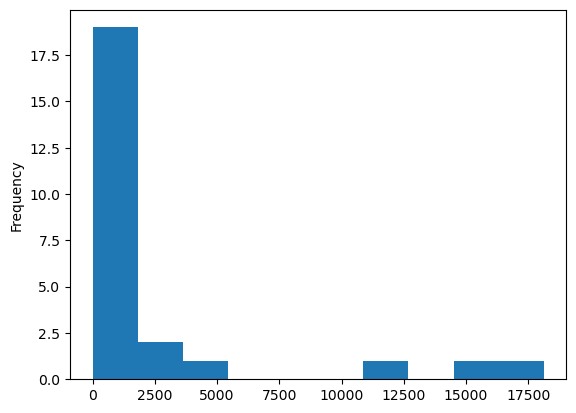

In [252]:
dr_df['SUB_EVENT_TYPE'].value_counts().plot(kind = 'hist')
plt.show()

# Contributions from Rabiat


### 1. Added `pd.set_option("display.max_columns", None)` to display all the columns of the dataset 
### 2. Created 2 plots


In [253]:
df.tail()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,ACTOR2,ASSOC_ACTOR_2,INTER2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
65530,404,KEN318,318,25-octobre-1998,1998,1,Violence against civilians,Attack,OLF: Oromo Liberation Front,Borana Ethnic Militia (Kenya),2,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,27,Eastern Africa,Kenya,Wajir,Wajir East,Township,Tuli,1643,40343,1,All Africa,Regional,OLF and Borana ethnic militia attack civilians...,28,1553544833
65531,404,KEN319,319,02-novembre-1998,1998,1,Protests,Peaceful protest,Protesters (Kenya),Students (Kenya),6,NaN,NaN,0,60,Eastern Africa,Kenya,Nairobi,Starehe,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,University students protest over killing in Wa...,0,1567465412
65532,404,KEN320,320,10-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,2,SPLM/A-Kerubino: Sudan People's Liberation Mov...,NaN,2,22,Eastern Africa,Kenya,Nairobi,Starehe,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Garangs SPLA security men raid home of Kerubin...,0,1604344065
65533,404,KEN323,323,14-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,2,SPLM/A-Kerubino: Sudan People's Liberation Mov...,NaN,2,22,Eastern Africa,Kenya,Nairobi,Starehe,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Rival SPLA factions battle at police station,0,1583194169
65534,404,KEN322,322,14-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,2,SPLM/A-Kerubino: Sudan People's Liberation Mov...,NaN,2,22,Eastern Africa,Kenya,Nairobi,Starehe,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Gang of youth loyal to Kerubinos SPLA faction ...,0,1583194169


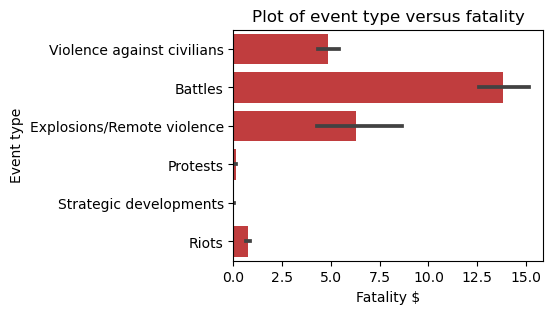

In [254]:
plt.figure(figsize=(4,3))
colors=sns.color_palette()[3]
ax = sns.barplot(y='EVENT_TYPE', x='FATALITIES',  data=df, color=colors)
plt.title('Plot of event type versus fatality')
plt.xlabel('Fatality $')
plt.ylabel('Event type')
#ax.bar_label(ax.containers[0])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

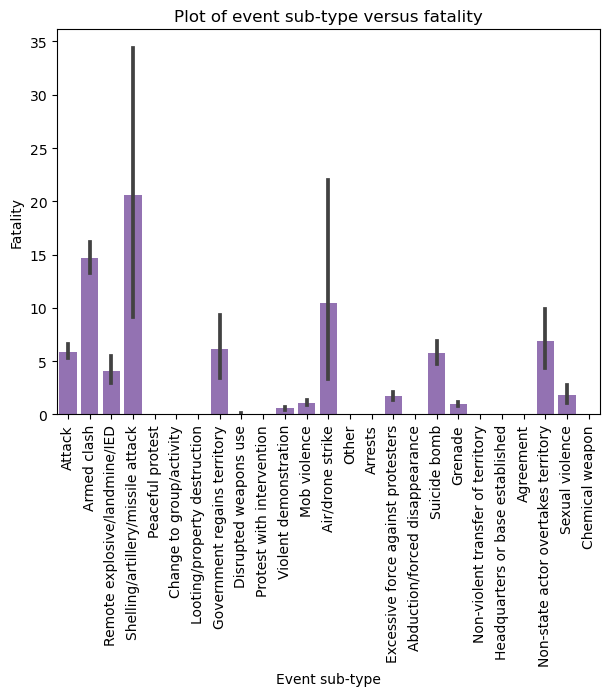

In [255]:
plt.figure(figsize=(7,5))
colors=sns.color_palette()[4]
ax = sns.barplot(x='SUB_EVENT_TYPE', y='FATALITIES',  data=df, color=colors)
plt.title('Plot of event sub-type versus fatality')
plt.ylabel('Fatality')
plt.xlabel('Event sub-type')
#ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# Building machine learning Model: To predict number of fatalities

## Model without the text columns

***Here we ectract just the numerical columns which we believe contributes to predicting fatalities and covert them into a list 

In [256]:
#Numeric columns
num_list= ["YEAR", "INTER1", "INTER2", 
           "INTERACTION", "LATITUDE", "LONGITUDE", "GEO_PRECISION" ]

#Convert to List
numeric_data_only = dr_df[num_list]

In [257]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(dr_df[num_list],df["FATALITIES"],test_size=0.3,random_state=42)

In [258]:
# Instantiate Linear Regression model
model = LinearRegression()

In [259]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [260]:
# Perform prediction with it
y_pred = model.predict(X_test)

## Evaluation

***For the evaluation metric, we considered the mean absolute error, the root mean squared error and the r2-score.

In [261]:
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
mae

11.17353491719403

In [262]:
# Root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

51.791728104622685

In [263]:
# R2- score
r2= r2_score(y_test, y_pred)
r2

0.02482171489958307

## Model with text columns included in the prediction

***Here we incoporate the text columns into our prediction using natural language processing tools such as:

        *** HashingVectorizer
        *** N-gram of words
        
***The numeric and text columns were incoperated using the Function transformer and the feature union tool.

***We next built a machine learning pipeline where we defined the follwoing:

    *** SelectKBest: A dimension reduction technique using `f_regression` as the statistical metric and we considered the 10 best features.
    *** SparseInteractions: A class which defines polynomial interaction method. We have specified polynomial degree of 2.
    *** MaxAbsScale: We used this tool to scale the features such that the value ranges between 0 and 1.
          

In [264]:
NUMERIC_COLUMNS= ["ISO","EVENT_ID_NO_CNTY","YEAR","TIME_PRECISION", "INTER1", "INTER2", 
           "INTERACTION", "LATITUDE", "LONGITUDE", "GEO_PRECISION", "TIMESTAMP" ]
LABELS=["FATALITIES"]

In [265]:
def combine_text_columns(data_frame, to_drop = NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [266]:
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

In [267]:
# Select K best features
K = 10
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [268]:
# Instantiate pipeline
pipeline = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data)
                   
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                       norm=None,binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(score_func=f_regression, k=K))
                ]))
             ]
        )),
        ('int', ut.SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', LinearRegression())
    ])

In [269]:
# Drop the target column
X = dr_df.drop(columns=["FATALITIES"])
# Extract only the target column
y = dr_df["FATALITIES"]

X_tr, X_te, y_tr, y_te = train_test_split(X,y, random_state=42)

In [270]:
# Here we fit our pipeline
pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f9d110ed990>))])),
                                                ('text_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function combine_text_columns at 0x7f9d118bc700>)),
                                                                 ('vectorizer',
                                                                  HashingVectorizer(ngram_range=(1,
                                                                                                 2),
                                                                                    norm=None,
                                                                                    token_pattern='[A-Za-z0-9]+(?=\\s+)')),
                                                                 ('dim_red',
                                                                  SelectKBest(score_func=<function f_regression at 0x7f9d606045e0>))]))])),
                ('int', SparseInteractions()), ('scale', MaxAbsScaler()),
                ('clf', LinearRegression())])

In [271]:
# We make predictions with our pipeline 
pred = pipeline.predict(X_te)

# Evaluation

In [272]:
# The root mean squared error
RMSE = np.sqrt(mean_squared_error(y_te, pred))
RMSE

15.790000750486108

In [273]:
# The mean absolute error
mae = mean_absolute_error(y_te, pred)
mae

4.674018363748015

In [274]:
# The r2- score
r2= r2_score(y_te, pred)
r2

0.9027005210703778

## Cross-validation to prevent overfitting

In this section, we performed the cross validation technique just to make sure our model is not overfitted.

In [275]:
# Defining our scoring metrics
scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error', 'mae': 'neg_mean_absolute_error'}

# Performing the cross validation
results = cross_validate(pipeline, X_tr, y_tr, scoring=scoring, cv=folds)

# Extracting the results for each metric
r2_scores = results['test_r2']
mse_scores = -results['test_mse']  
mae_scores = -results['test_mae']  

In [276]:
r2_scores

array([0.87105191, 0.77992558, 0.92348493, 0.83319508, 0.84071177])

In [277]:
rmse_scores = np.sqrt(mse_scores)
rmse_scores

array([19.38448851, 23.23301067, 16.28696829, 24.63746873, 25.35390187])

In [278]:
mae_scores

array([4.73625238, 4.90106467, 4.75524842, 4.99687063, 5.25249347])